In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Cross-validation accuracy: 0.9291 ± 0.0063
 Evaluation report saved: /content/drive/MyDrive/customer-churn-prediction/reports/evaluation_report.txt
 Classification report saved: /content/drive/MyDrive/customer-churn-prediction/reports/classification_report.txt


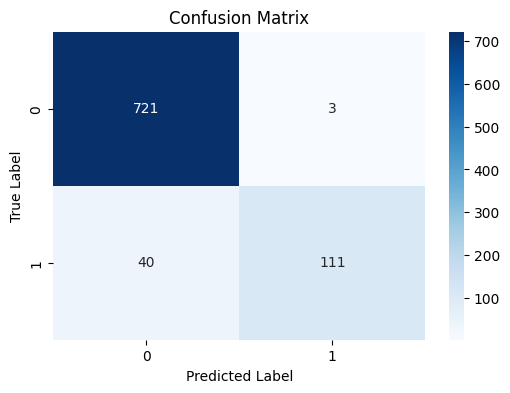

 Confusion matrix saved: /content/drive/MyDrive/customer-churn-prediction/reports/confusion_matrix.png


In [2]:
import os
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Define paths
base_path = "/content/drive/MyDrive/customer-churn-prediction"
train_data_path = os.path.join(base_path, "data/processed/train.csv")
test_data_path = os.path.join(base_path, "data/processed/test.csv")
model_path = os.path.join(base_path, "models/best_random_forest_model.pkl")
report_path = os.path.join(base_path, "reports")  # New reports folder

# Create report directory if not exists
os.makedirs(report_path, exist_ok=True)

# Load datasets
df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

X_train = df_train.drop(columns=['Churn'])
y_train = df_train['Churn']
X_test = df_test.drop(columns=['Churn'])
y_test = df_test['Churn']

# Ensure feature consistency
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Load trained model
best_rf = joblib.load(model_path)

# Perform cross-validation
cv_scores = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy')
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()
print(f"Cross-validation accuracy: {cv_mean:.4f} ± {cv_std:.4f}")

# Evaluate on train data
y_train_pred = best_rf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Evaluate on test data
y_test_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Check for overfitting
overfitting = (train_accuracy - test_accuracy) > 0.05

#  Save Evaluation Report
evaluation_report_path = os.path.join(report_path, "evaluation_report.txt")
with open(evaluation_report_path, "w") as f:
    f.write(" Model Performance Comparison (Overfitting Check):\n")
    f.write(f"Train Accuracy: {train_accuracy:.4f} | Test Accuracy: {test_accuracy:.4f}\n")
    f.write(f"Train Precision: {train_precision:.4f} | Test Precision: {test_precision:.4f}\n")
    f.write(f"Train Recall: {train_recall:.4f} | Test Recall: {test_recall:.4f}\n")
    f.write(f"Train F1 Score: {train_f1:.4f} | Test F1 Score: {test_f1:.4f}\n\n")
    f.write(f" Possible Overfitting: {overfitting}\n")

print(f" Evaluation report saved: {evaluation_report_path}")

# Save Classification Report
classification_report_str = classification_report(y_test, y_test_pred)
classification_report_path = os.path.join(report_path, "classification_report.txt")
with open(classification_report_path, "w") as f:
    f.write("Classification Report (Test Data):\n")
    f.write(classification_report_str)

print(f" Classification report saved: {classification_report_path}")

# Generate and Save Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Save the confusion matrix plot
conf_matrix_path = os.path.join(report_path, "confusion_matrix.png")
plt.savefig(conf_matrix_path)
plt.show()

print(f" Confusion matrix saved: {conf_matrix_path}")
